In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install kaggle 
# pip install kagglehub
#run this above command if the kaggle is not installed on your machine

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)

Path to dataset files: /Users/I325715/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2


In [4]:
df=pd.read_csv(path+"/train.csv")

In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df.shape

(7352, 563)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
df.nunique()

tBodyAcc-mean()-X       7347
tBodyAcc-mean()-Y       7352
tBodyAcc-mean()-Z       7349
tBodyAcc-std()-X        7349
tBodyAcc-std()-Y        7351
                        ... 
angle(X,gravityMean)    7352
angle(Y,gravityMean)    7352
angle(Z,gravityMean)    7352
subject                   21
Activity                   6
Length: 563, dtype: int64

In [31]:
missing_cols=df.columns[df.isnull().sum()>0]
# Print columns with missing values
print("Columns with Missing Values:\n", missing_cols)

Columns with Missing Values:
 Index([], dtype='object')


In [30]:
missing_cols=df.columns[df.isna().sum()>0]
# Print columns with missing values
print("Columns with Missing Values:\n", missing_cols)

Columns with Missing Values:
 Index([], dtype='object')


In [10]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [11]:
len(df[df.duplicated()])

0

In [12]:
print(df['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


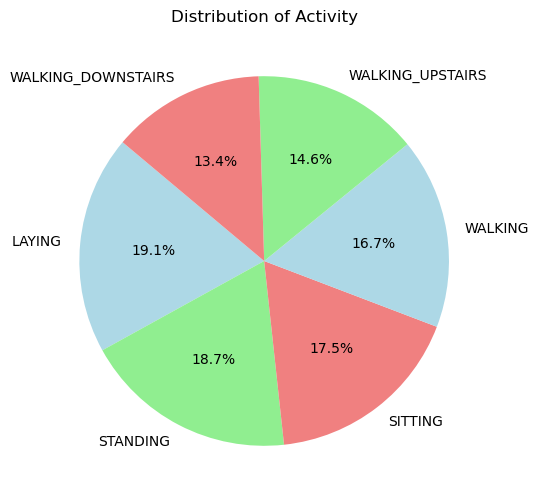

In [13]:
#Check the Target Class Imbalance

# Count occurrences of each unique label
label_counts = df['Activity'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Distribution of Activity")
plt.show()

In [16]:
X_initial = df.iloc[:,:-1]
y_initial=df.iloc[:,-1]
# Compute correlation matrix of the columns to remove the redundant columns present
corr_matrix = X_initial.corr()


# its difficult to visualize correlated max having 563 columns

# Compute the correlation matrix
corr_matrix_abs = corr_matrix.abs()  # Get absolute correlation values

# Create an upper triangular mask to avoid duplicate comparisons
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Find columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated columns
df_cleaned = df.drop(columns=to_drop)

print("Original DataFrame:\n", df.shape)
print("\nCorrelation Matrix:\n", corr_matrix_abs.shape)
print("\nColumns dropped:", to_drop)
print("\nCleaned DataFrame:\n", df_cleaned.shape)

Original DataFrame:
 (7352, 563)

Correlation Matrix:
 (562, 562)

Columns dropped: ['tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-m

In [17]:
X = df_cleaned.iloc[:,:-1]
y =df_cleaned.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
from sklearn import svm
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
svc_linear = svm.SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
# make predictions on test set
y_pred=svc_linear.predict(X_test)
# compute and print accuracy score
print('SVC Linear: Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

print('\n\nConfusion matrix\n\n', cm)

SVC Linear: Model accuracy score with default hyperparameters: 0.9762

Classification Report:

                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.93      0.95      0.94       262
          STANDING       0.96      0.93      0.94       276
           WALKING       1.00      0.99      1.00       247
WALKING_DOWNSTAIRS       0.99      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



Confusion matrix

 [[280   0   0   0   0   0]
 [  0 250  12   0   0   0]
 [  0  19 257   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   0 206   0]
 [  0   0   0   0   2 198]]


In [22]:
svc_poly = svm.SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
# make predictions on test set
y_pred=svc_poly.predict(X_test)
# compute and print accuracy score
print('SVC poly: Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print('\n\nConfusion matrix\n\n', cm)

SVC poly: Model accuracy score with default hyperparameters: 0.8375

Classification Report:

                     precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       280
           SITTING       0.92      0.69      0.79       262
          STANDING       0.76      0.94      0.84       276
           WALKING       0.64      0.98      0.78       247
WALKING_DOWNSTAIRS       1.00      0.65      0.78       206
  WALKING_UPSTAIRS       0.95      0.69      0.80       200

          accuracy                           0.84      1471
         macro avg       0.88      0.82      0.83      1471
      weighted avg       0.87      0.84      0.84      1471



Confusion matrix

 [[278   0   0   1   0   1]
 [  1 180  80   1   0   0]
 [  0  16 260   0   0   0]
 [  0   0   0 243   0   4]
 [  0   0   0  70 133   3]
 [  0   0   0  62   0 138]]


In [23]:
svc_rbf = svm.SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
# make predictions on test set
y_pred=svc_rbf.predict(X_test)
# compute and print accuracy score
print('SVC RBF: Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print('\n\nConfusion matrix\n\n', cm)

SVC RBF: Model accuracy score with default hyperparameters: 0.9361

Classification Report:

                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.89      0.83      0.86       262
          STANDING       0.85      0.90      0.87       276
           WALKING       0.97      0.98      0.97       247
WALKING_DOWNSTAIRS       0.99      0.95      0.97       206
  WALKING_UPSTAIRS       0.95      0.98      0.96       200

          accuracy                           0.94      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.94      0.94      0.94      1471



Confusion matrix

 [[280   0   0   0   0   0]
 [  0 217  45   0   0   0]
 [  0  28 248   0   0   0]
 [  0   0   0 241   0   6]
 [  0   0   0   6 195   5]
 [  0   0   0   2   2 196]]


In [41]:
df_test=pd.read_csv(path+"/test.csv")
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [42]:
#dropping column found to be highly corelated to avoid redudancy
df_test=df_test.drop(columns=['tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X', 'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z', 'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z', 'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-iqr()-X', 'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-iqr()-Z', 'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z', 'tBodyAccJerk-arCoeff()-X,1', 'tBodyAccJerk-arCoeff()-Y,1', 'tBodyAccJerk-arCoeff()-Z,1', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z', 'tBodyGyro-max()-Y', 'tBodyGyro-min()-Z', 'tBodyGyro-sma()', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-mad()-X', 'tBodyGyroJerk-mad()-Y', 'tBodyGyroJerk-mad()-Z', 'tBodyGyroJerk-max()-X', 'tBodyGyroJerk-max()-Y', 'tBodyGyroJerk-max()-Z', 'tBodyGyroJerk-min()-X', 'tBodyGyroJerk-min()-Y', 'tBodyGyroJerk-min()-Z', 'tBodyGyroJerk-sma()', 'tBodyGyroJerk-iqr()-X', 'tBodyGyroJerk-iqr()-Y', 'tBodyGyroJerk-iqr()-Z', 'tBodyGyroJerk-entropy()-X', 'tBodyGyroJerk-entropy()-Y', 'tBodyGyroJerk-entropy()-Z', 'tBodyGyroJerk-arCoeff()-X,1', 'tBodyGyroJerk-arCoeff()-Y,1', 'tBodyGyroJerk-arCoeff()-Z,1', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tBodyAccMag-arCoeff()2', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-sma()', 'tBodyGyroMag-iqr()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-mad()', 'tBodyGyroJerkMag-max()', 'tBodyGyroJerkMag-sma()', 'tBodyGyroJerkMag-energy()', 'tBodyGyroJerkMag-iqr()', 'tBodyGyroJerkMag-entropy()', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 'fBodyAcc-mean()-Z', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAcc-mad()-X', 'fBodyAcc-mad()-Y', 'fBodyAcc-mad()-Z', 'fBodyAcc-max()-X', 'fBodyAcc-max()-Y', 'fBodyAcc-max()-Z', 'fBodyAcc-sma()', 'fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z', 'fBodyAcc-iqr()-X', 'fBodyAcc-iqr()-Y', 'fBodyAcc-iqr()-Z', 'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-entropy()-Z', 'fBodyAcc-kurtosis()-X', 'fBodyAcc-kurtosis()-Y', 'fBodyAcc-kurtosis()-Z', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1', 'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1', 'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1', 'fBodyAcc-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-17,32.2', 'fBodyAcc-bandsEnergy()-33,48.2', 'fBodyAcc-bandsEnergy()-49,64.2', 'fBodyAcc-bandsEnergy()-1,24.2', 'fBodyAcc-bandsEnergy()-25,48.2', 'fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccJerk-std()-Z', 'fBodyAccJerk-mad()-X', 'fBodyAccJerk-mad()-Y', 'fBodyAccJerk-mad()-Z', 'fBodyAccJerk-max()-X', 'fBodyAccJerk-max()-Y', 'fBodyAccJerk-max()-Z', 'fBodyAccJerk-sma()', 'fBodyAccJerk-energy()-X', 'fBodyAccJerk-energy()-Y', 'fBodyAccJerk-energy()-Z', 'fBodyAccJerk-iqr()-X', 'fBodyAccJerk-iqr()-Y', 'fBodyAccJerk-iqr()-Z', 'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAccJerk-bandsEnergy()-25,32', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-17,32', 'fBodyAccJerk-bandsEnergy()-33,48', 'fBodyAccJerk-bandsEnergy()-49,64', 'fBodyAccJerk-bandsEnergy()-1,24', 'fBodyAccJerk-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-9,16.1', 'fBodyAccJerk-bandsEnergy()-17,24.1', 'fBodyAccJerk-bandsEnergy()-25,32.1', 'fBodyAccJerk-bandsEnergy()-33,40.1', 'fBodyAccJerk-bandsEnergy()-1,16.1', 'fBodyAccJerk-bandsEnergy()-17,32.1', 'fBodyAccJerk-bandsEnergy()-33,48.1', 'fBodyAccJerk-bandsEnergy()-49,64.1', 'fBodyAccJerk-bandsEnergy()-1,24.1', 'fBodyAccJerk-bandsEnergy()-25,48.1', 'fBodyAccJerk-bandsEnergy()-9,16.2', 'fBodyAccJerk-bandsEnergy()-17,24.2', 'fBodyAccJerk-bandsEnergy()-25,32.2', 'fBodyAccJerk-bandsEnergy()-33,40.2', 'fBodyAccJerk-bandsEnergy()-41,48.2', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAccJerk-bandsEnergy()-17,32.2', 'fBodyAccJerk-bandsEnergy()-33,48.2', 'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyAccJerk-bandsEnergy()-1,24.2', 'fBodyAccJerk-bandsEnergy()-25,48.2', 'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'fBodyGyro-std()-X', 'fBodyGyro-std()-Y', 'fBodyGyro-std()-Z', 'fBodyGyro-mad()-X', 'fBodyGyro-mad()-Y', 'fBodyGyro-mad()-Z', 'fBodyGyro-max()-X', 'fBodyGyro-max()-Y', 'fBodyGyro-max()-Z', 'fBodyGyro-sma()', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z', 'fBodyGyro-iqr()-X', 'fBodyGyro-iqr()-Y', 'fBodyGyro-iqr()-Z', 'fBodyGyro-entropy()-X', 'fBodyGyro-entropy()-Y', 'fBodyGyro-entropy()-Z', 'fBodyGyro-kurtosis()-X', 'fBodyGyro-kurtosis()-Y', 'fBodyGyro-kurtosis()-Z', 'fBodyGyro-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-17,32', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyGyro-bandsEnergy()-1,24', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyGyro-bandsEnergy()-1,16.1', 'fBodyGyro-bandsEnergy()-17,32.1', 'fBodyGyro-bandsEnergy()-33,48.1', 'fBodyGyro-bandsEnergy()-49,64.1', 'fBodyGyro-bandsEnergy()-1,24.1', 'fBodyGyro-bandsEnergy()-25,48.1', 'fBodyGyro-bandsEnergy()-1,8.2', 'fBodyGyro-bandsEnergy()-1,16.2', 'fBodyGyro-bandsEnergy()-17,32.2', 'fBodyGyro-bandsEnergy()-33,48.2', 'fBodyGyro-bandsEnergy()-49,64.2', 'fBodyGyro-bandsEnergy()-1,24.2', 'fBodyGyro-bandsEnergy()-25,48.2', 'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-mad()', 'fBodyAccMag-max()', 'fBodyAccMag-sma()', 'fBodyAccMag-energy()', 'fBodyAccMag-iqr()', 'fBodyAccMag-entropy()', 'fBodyAccMag-kurtosis()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyAccJerkMag-std()', 'fBodyBodyAccJerkMag-mad()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-sma()', 'fBodyBodyAccJerkMag-energy()', 'fBodyBodyAccJerkMag-iqr()', 'fBodyBodyAccJerkMag-entropy()', 'fBodyBodyAccJerkMag-kurtosis()', 'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-std()', 'fBodyBodyGyroMag-mad()', 'fBodyBodyGyroMag-max()', 'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroMag-iqr()', 'fBodyBodyGyroMag-entropy()', 'fBodyBodyGyroMag-kurtosis()', 'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-std()', 'fBodyBodyGyroJerkMag-mad()', 'fBodyBodyGyroJerkMag-max()', 'fBodyBodyGyroJerkMag-sma()', 'fBodyBodyGyroJerkMag-energy()', 'fBodyBodyGyroJerkMag-iqr()', 'fBodyBodyGyroJerkMag-entropy()', 'fBodyBodyGyroJerkMag-kurtosis()', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)'])    


In [43]:

Xtest = df_test.iloc[:,:-1]
ytest=df_test.iloc[:,-1]
    
ytest_pred= svc_rbf.predict(Xtest)

# compute and print accuracy score
print('SVC Linear: Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(ytest, ytest_pred)))
print("\nClassification Report:\n\n", classification_report(ytest, ytest_pred))


cm = confusion_matrix(ytest, ytest_pred)

print('\n\nConfusion matrix\n\n', cm)

SVC Linear: Model accuracy score with default hyperparameters: 0.9114

Classification Report:

                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.81      0.83       491
          STANDING       0.84      0.88      0.86       532
           WALKING       0.88      1.00      0.93       496
WALKING_DOWNSTAIRS       0.97      0.84      0.90       420
  WALKING_UPSTAIRS       0.94      0.93      0.93       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



Confusion matrix

 [[537   0   0   0   0   0]
 [  0 399  89   0   0   3]
 [  0  66 466   0   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0  44 351  25]
 [  0   0   0  25   8 438]]


In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [35]:
# Encode target labels (Convert categorical to numeric)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
#Now lets apply the deep learning Model 

# Define model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')  # Softmax for multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         8,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,790 (34.34 KB)

 Trainable params: 8,790 (34.34 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.4035 - loss: 1.4024 - val_accuracy: 0.8457 - val_loss: 0.4776
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7545 - loss: 0.5969 - val_accuracy: 0.8933 - val_loss: 0.2666
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8623 - loss: 0.3562 - val_accuracy: 0.9109 - val_loss: 0.2230
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8871 - loss: 0.2922 - val_accuracy: 0.9361 - val_loss: 0.1572
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9217 - loss: 0.2278 - val_accuracy: 0.9545 - val_loss: 0.1300
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9274 - loss: 0.1875 - val_accuracy: 0.9511 - val_loss: 0.1269
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9359 - loss: 0.1803 - val_accuracy: 0.9497 - val_loss: 0.1305
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9370 - loss: 0.1563 - 

In [38]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9812 - loss: 0.0536  
Test Accuracy: 0.9714


In [46]:
# Predict class labels
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted Classes:", encoder.inverse_transform(predicted_classes[:10]))
print("Actual Classes:", encoder.inverse_transform(y_test[:10]))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
Predicted Classes: ['WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING' 'SITTING'
 'WALKING_DOWNSTAIRS' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING'
 'WALKING_DOWNSTAIRS' 'STANDING']
Actual Classes: ['WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING' 'SITTING'
 'WALKING_DOWNSTAIRS' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING'
 'WALKING_DOWNSTAIRS' 'STANDING']


In [50]:
# Predict class probabilities for test data 
predictionsOnTestData = model.predict(Xtest)

# Convert probabilities to class labels
predicted_classes_on_testData = np.argmax(predictionsOnTestData, axis=1)

# Convert numeric labels back to original class names
print("Predicted Classes:", encoder.inverse_transform(predicted_classes_on_testData[:10]))
print("Actual Classes:", ytest[:10])

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
Predicted Classes: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING'
 'STANDING' 'STANDING' 'STANDING' 'STANDING']
Actual Classes: 0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
5    STANDING
6    STANDING
7    STANDING
8    STANDING
9    STANDING
Name: Activity, dtype: object
